In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Berlin_dfmguest.csv',
                   encoding='utf8')

In [3]:
df.head(2)

,Unnamed: 0,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_id,room_type
0,0,8.0,10.0,10.0,0.057015,1206,52.508112,13.258975,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,11850,1,4541865,Entire home/apt
1,1,1.0,2.0,2.0,0.057015,1206,52.489508,13.327372,30,3.0,Charlottenburg-Wilmersdorf,4.0,104.0,9,11850,1,3995729,Entire home/apt


In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [6]:
df = df[df.price <= 1000]


In [7]:
df.shape

(14790, 17)

In [8]:
X = df[[x for x in df.columns if x not in ['bhk','price','latitude','longitude','room_id']]]
y = df.price.values
target = np.log(y)


In [9]:
formula = "target ~ "+' + '.join(X)+' -1'
formula

u'target ~ bathrooms + bedrooms + dist_arprt + host_count + metrostn_count + minstay + neighborhood + overall_satisfaction + rest_count + review_count + reviews + room_type -1'

In [10]:
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
y = y.values.ravel()

In [11]:
y

array([ 4.38202663,  4.6443909 ,  5.48063892, ...,  3.78418963,
        3.29583687,  3.78418963])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [13]:
X_train.shape, X_test.shape

((10353, 24), (4437, 24))

In [14]:
X_test.head(2)

,neighborhood[Charlottenburg-Wilmersdorf],neighborhood[Friedrichshain-Kreuzberg],neighborhood[Lichtenberg],neighborhood[Marzahn-Hellersdorf],neighborhood[Mitte],neighborhood[Neukolln],neighborhood[Pankow],neighborhood[Reinickendorf],neighborhood[Spandau],neighborhood[Steglitz-Zehlendorf],...,bathrooms,bedrooms,dist_arprt,host_count,metrostn_count,minstay,overall_satisfaction,rest_count,review_count,reviews
2320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.151517,3596.0,19.0,3.0,5.0,12.0,55932.0,5.0
11050,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,3.0,0.159721,2572.0,5.0,13.0,2.0,8.0,40694.0,0.0


In [15]:
linmod = LinearRegression()

In [16]:
scores = cross_val_score(linmod, X_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[ 0.45590696  0.47750466  0.50004352  0.48108594  0.4838365   0.50600239
  0.52362207  0.50393817  0.41077781  0.4953769 ]
0.483809494002
0.0300656369875


In [17]:
predictions = cross_val_predict(linmod, X_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


-20848.202454


In [18]:
residuals = y_test - predictions
residuals

array([ 0.11688431,  0.34002221, -0.4605626 , ...,  0.19491215,
        0.12454922,  0.1259961 ])

In [19]:
np.mean(predictions)


2.871263825690459

In [20]:
linmod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
linmod.score(X_test, y_test)

-30997.888413042725

In [22]:
#linmod.coef_

In [23]:
print np.mean(y_train), np.mean(y_test)

4.04063861826 4.04080485591


In [24]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [25]:
Xn = StandardScaler().fit_transform(X)

In [26]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [27]:
enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1)
enet_cv.fit(Xn_train, y_train)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.515...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
       max_iter=1000, n_alphas=300, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=1)

In [28]:
print enet_cv.l1_ratio_
print enet_cv.alpha_

1.0
0.00178751834782


In [29]:
enet = ElasticNet(alpha= enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)

y_pred_enet = enet.fit(Xn_train, y_train).predict(Xn_test)
r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)


ElasticNet(alpha=0.0017875183478151728, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
r^2 on test data : 0.466105


In [30]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [31]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [32]:
lassocv.alpha_

0.0017875183478151728

In [33]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso_model = lasso.fit(Xn_train, y_train)
y_pred_lasso = lasso_model.predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.0017875183478151728, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.466105


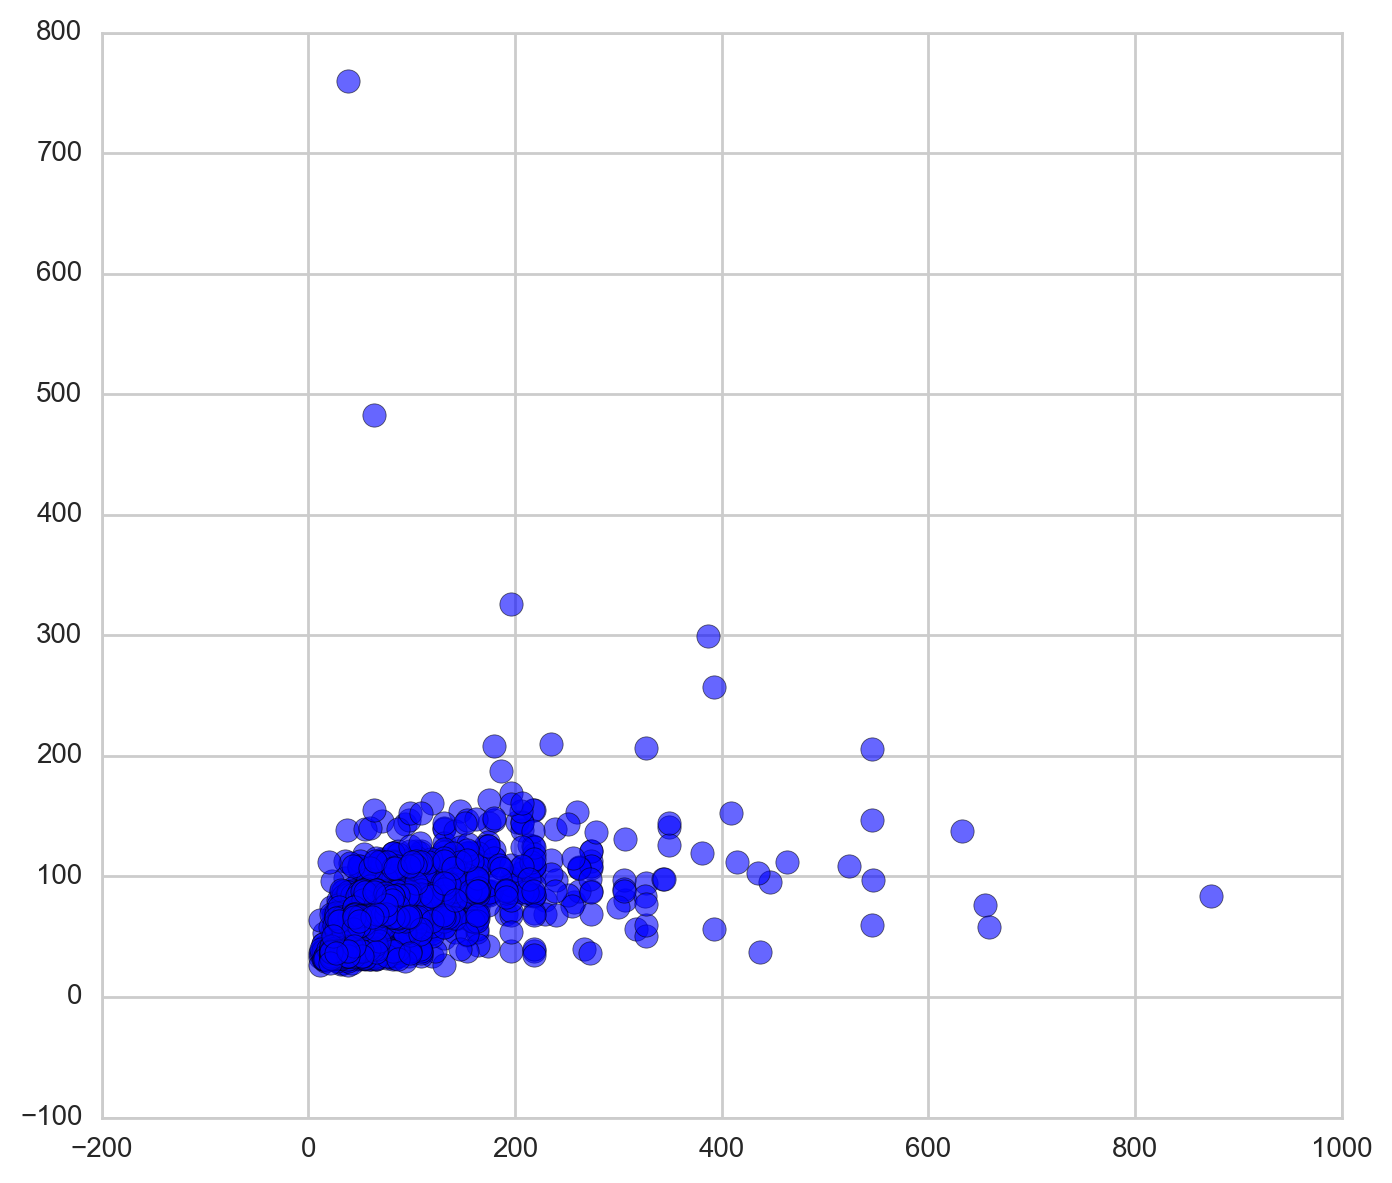

In [34]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(np.exp(y_test), np.exp(y_pred_lasso), s=70, alpha=0.6)
plt.show()

In [35]:
residuals = np.exp(y_test) - np.exp(y_pred_enet)

In [36]:
y_pred_enet_all = enet.fit(Xn_train, y_train).predict(Xn)


In [37]:
residuals_all = np.exp(y) - np.exp(y_pred_enet_all)

In [38]:
len(residuals_all)

14790

In [39]:
df['residuals'] = residuals_all

In [40]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_id,room_type,residuals
0,8.0,10.0,10.0,0.057015,1206,52.508112,13.258975,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,11850,1,4541865,Entire home/apt,-1274.303603
1,1.0,2.0,2.0,0.057015,1206,52.489508,13.327372,30,3.0,Charlottenburg-Wilmersdorf,4.0,104.0,9,11850,1,3995729,Entire home/apt,16.090929


In [41]:
df = df[df['residuals']<0]

In [42]:
df = df.reset_index(drop=True)

In [43]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_id,room_type,residuals
0,8.0,10.0,10.0,0.057015,1206,52.508112,13.258975,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,11850,1,4541865,Entire home/apt,-1274.303603
1,1.0,1.0,1.0,0.057015,1206,52.507770,13.284347,30,28.0,Charlottenburg-Wilmersdorf,4.5,17.0,9,11850,43,695511,Private room,-23.280336


In [44]:
df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Berlin_dfwithres.csv')